<h1> Implicit-Explicit Runge-Kutta: Gray-Scott Equation
</h1>

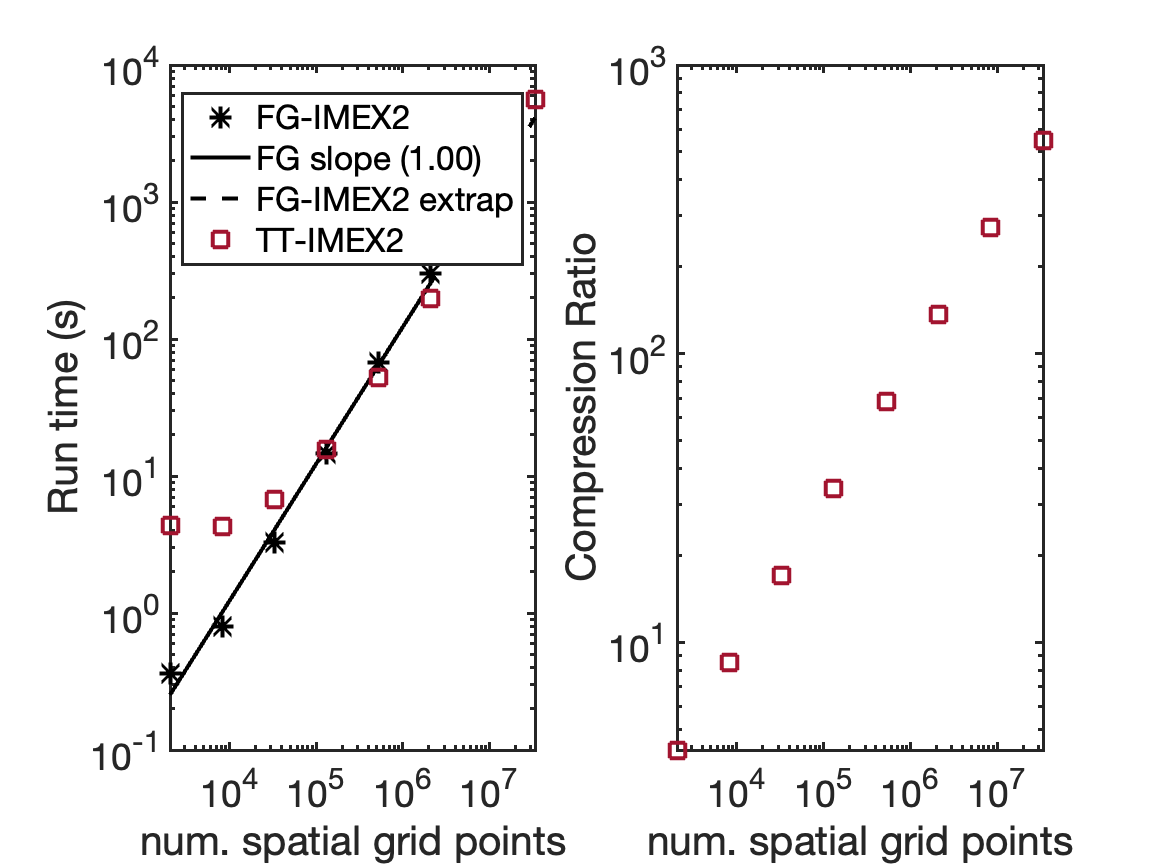

In [1]:
close all; clear; clc;

%% Load imex data (first run)
temp = load('efficiency_imex_step.mat');
N = temp.Nvalues;
num_entries = 2*N.^2;
mname = temp.mname;

% full grid 
P = temp.P; 
fgtimes  = cellfun(@(c) c.time,P); 
fglits = cellfun(@(c) c.lits,P);
dtvals = cellfun(@(c) c.dt,P);

% tt
R = temp.R;
tt_times = cellfun(@(c) c.time, R);
tt_lits = cellfun(@(c) c.lits, R);
Compr = cellfun(@(c) compress_ratio_tt(c.Ytt{end}),R);
ranks =  cellfun(@(c) max(c.Ytt{end}.r),R);

%% Load imex data (second run)
temp = load('efficiency_imex_step_tt_large.mat');
R = temp.R;
nonempty = ~cellfun(@isempty, R);  % find nonempty entries
R = R(nonempty);
Nlarge = temp.Nvalues;
Nlarge = Nlarge(nonempty);
% Find which elements of N are in Nlarge and their positions
[isMember, originalPositions] = ismember(N, Nlarge); 

% Filter out only valid positions (non-zero indicates a match)
validPositions = originalPositions(isMember);

% Remove the elements at these positions from Nlarge and R
Nlarge(validPositions) = [];
R(validPositions) = [];

num_entries_large = 2*Nlarge.^2;
tt_times_large = cellfun(@(c) c.time, R);
tt_lits_large = cellfun(@(c) c.lits, R);
Compr_large = cellfun(@(c) compress_ratio_tt(c.Ytt{end}),R);

%% Set colors and markers
% colors
imexcolor = [0.6350 0.0780 0.1840]; %redish
dirkcolor = [0 0.4470 0.7410]; %blueish
fgcolor = [0 0 0]; %black

% markers
imexmark = 'square';
dirkmark = 'o';
fgmark = '*';

%%Plot efficiency 
figure()
p = polyfit(log10(num_entries), log10(fgtimes),1);
log_yfg = polyval(p,log10(num_entries));
yfg = 10.^(log_yfg);

log_yfg_extrap = polyval(p,log10([num_entries,num_entries_large]));
yfg_extrap = 10.^(log_yfg_extrap);

%% Run time
subplot(1,2,1) 
loglog(num_entries,fgtimes,'color',fgcolor,'Marker',fgmark,...
    'LineStyle','none','DisplayName','FG-IMEX2')
hold on 
loglog(num_entries,yfg,'-','color',fgcolor,...
    'DisplayName',['FG slope (',num2str(p(1),'%.2f'),')'])
hold on
loglog([num_entries,num_entries_large], yfg_extrap,'--','color',fgcolor,...
    'DisplayName','FG-IMEX2 extrap')

p = polyfit(log10(num_entries), log10(tt_times),1);
log_ytt = polyval(p,log10(num_entries));
ytt = 10.^(log_ytt);

loglog([num_entries,num_entries_large],[tt_times,tt_times_large], ...
    'color',imexcolor,'Marker',imexmark,'LineStyle','none','DisplayName','TT-IMEX2')
hold on
% loglog(num_entries_large,tt_times_large,...
%     'color',imexcolor,'Marker',imexmark,'DisplayName','TT-IMEX2')
% loglog(num_entries,ytt, '-','color',imexcolor,'DisplayName',['slope (', num2str(p(1)), ')'])

hAxis = gca;
hAxis.XTick = 10.^(3:7);
xlabel('num. spatial grid points'), ylabel('Run time (s)')
legend('Location','best')
hold off

%% Compression Ratio
subplot(1,2,2)  
loglog([num_entries,num_entries_large], [1./Compr,1./Compr_large], ...
    'color',imexcolor,'Marker',imexmark,'LineStyle','none')
xlabel('num. spatial grid points'), ylabel('Compression Ratio')
hAxis = gca;
hAxis.XTick = 10.^(3:7);
% saveas(gcf,'figs/appraisalfigs/gs_imex_extrap','epsc')